In [31]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm


from matplotlib import cm

In [2]:
ly = 0.11 * 1000
sigma_Y = 0.5
K_G = math.exp(-11.5)
K_A = np.exp(-11.5+sigma_Y**2/2)#K_G*(1+sigma_Y**2/2)


In [3]:
df_K_25 = pd.read_pickle('df_K_2_mean_25.pkl')
df_q_25 = pd.read_pickle('df_q_2_mean_25.pkl')

K_25 = df_K_25.values
q_25 = df_q_25.values

K_eff_25 =  np.array([np.sum(k*q_25.T) for k in K_25])

K_st = K_eff_25[-1]
b_eff_25 = (K_eff_25-K_st) /(K_A - K_st)


In [4]:
df_K_75 = pd.read_pickle('df_K_2_mean_75.pkl')
df_q_75 = pd.read_pickle('df_q_2_mean_75.pkl')

K_75 = df_K_75.values
q_75 = df_q_75.values

K_eff_75 =  np.array([np.sum(k*q_75.T) for k in K_75])

K_st = K_eff_75[-1]
b_eff_75 = (K_eff_75-K_st) /(K_A - K_st)


In [5]:
df_K_50 = pd.read_pickle('df_K_2_mean_50.pkl')
df_q_50 = pd.read_pickle('df_q_2_mean_50.pkl')

K_50 = df_K_50.values
q_50 = df_q_50.values

K_eff_50 =  np.array([np.sum(k*q_50.T) for k in K_50])

K_st = K_eff_50[-1]
b_eff_50 = (K_eff_50-K_st) /(K_A - K_st)


In [6]:
math.exp(-11.5)




1.013009359863071e-05

In [7]:
t = np.arange(1,1601)*54
t[-1]

86400

In [8]:
t_bar = t / (ly**2) * 1e-5 /1e-6
t_bar

array([4.46280992e-02, 8.92561983e-02, 1.33884298e-01, ...,
       7.13157025e+01, 7.13603306e+01, 7.14049587e+01])

In [9]:
b_2 = 1 - (math.pi * t_bar)**0.5 * np.exp(t_bar) * special.erfc(t_bar ** 0.5)
b_1 = (np.exp(t_bar) * special.erfc(t_bar ** 0.5))

In [10]:
b_1

array([0.80004435, 0.73545434, 0.6914812 , ..., 0.06634974, 0.06632927,
       0.06630882])

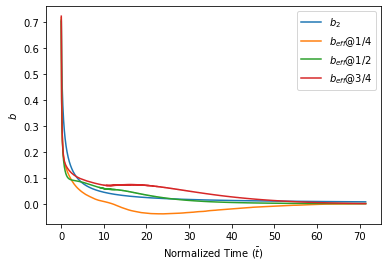

In [21]:
# plt.plot(t_bar,b_1)
plt.plot(t_bar,b_2)
plt.plot(t_bar,b_eff_25)
plt.plot(t_bar,b_eff_50)
plt.plot(t_bar,b_eff_75)


plt.xlabel(r'Normalized Time ($\bar {t}$)')
plt.ylabel(r'$b$')
plt.legend((r'$b_2$','$b_{eff}@1/4$','$b_{eff}@1/2$','$b_{eff}@3/4$'))

# plt.axis([0, 500, 0, 0.55])

# plt.plot(t_bar,1/(2*t_bar))

plt.savefig('plot_b', dpi=300)

In [14]:
df_K = pd.read_pickle('df_K_2_multi.pkl')
df_q = pd.read_pickle('df_q_2_multi.pkl')


K_ = df_K.values
q_ = df_q.values

In [15]:

ly = 0.11 * 1000
sigma_Y = 0.5
K_G = math.exp(-11.5)

K_eff =  np.array([np.sum(k*q_.T) for k in K_])
# K_A = math.exp(sigma_Y**2/2 -4.5 )
K_A = np.exp(-11.5+sigma_Y**2/2)#K_G*(1+sigma_Y**2/2)
K_st = K_eff[-1]
b_eff = (K_eff-K_st) /(K_A - K_st)

K_A - K_st

1.493085532195351e-06

In [40]:
x1_2d = df_K.values.T
w1 = df_q.values[:,0]
d1 = sm.DescrStatsW(x1_2d, weights=w1)
df_mean = d1.mean
df_perc = d1.quantile([0.25,0.5,0.75]).values.T

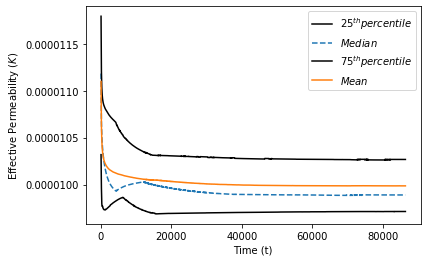

In [41]:
plt.plot(t,df_perc[:,0],'k',label=r'$25^{th} percentile$')
# plt.plot(t,b_2)

plt.plot(t,df_perc[:,1],'--',label=r'$Median$')
plt.plot(t,df_perc[:,2],'k',label=r'$75^{th} percentile$')
plt.plot(t,df_mean,label=r'$Mean$')

# plt.axis([0, 5, 0.50, 2])

plt.xlabel(r'Time (t)')
plt.ylabel(r'Effective Permeability ($K$)')
# ax.set_yscale('log')
plt.legend()

plt.savefig('plot_percentile', dpi=300)

In [42]:
b_perc = (df_perc-K_st) /(K_A - K_st)
b_mean = (df_mean-K_st) /(K_A - K_st)

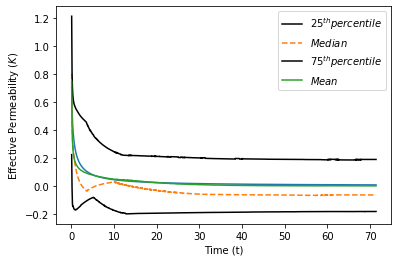

In [43]:
plt.plot(t_bar,b_perc[:,0],'k',label=r'$25^{th} percentile$')
plt.plot(t_bar,b_2)

plt.plot(t_bar,b_perc[:,1],'--',label=r'$Median$')
plt.plot(t_bar,b_perc[:,2],'k',label=r'$75^{th} percentile$')
plt.plot(t_bar,b_mean,label=r'$Mean$')

# plt.axis([0, 5, 0.50, 2])

plt.xlabel(r'Time (t)')
plt.ylabel(r'Effective Permeability ($K$)')
# ax.set_yscale('log')
plt.legend()

plt.savefig('plot_percentile', dpi=300)

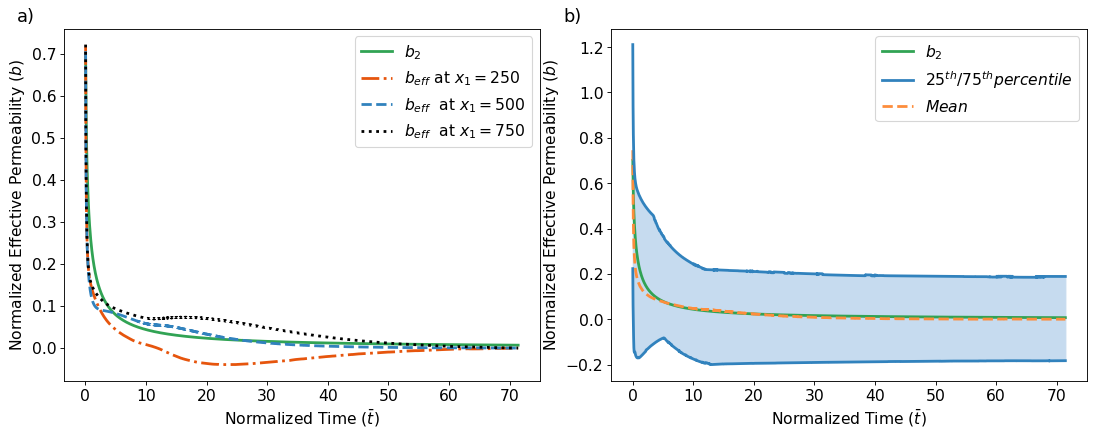

In [85]:
my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

plt.plot(t_bar,b_2,linewidth=2.5,color=cm.get_cmap('tab20c')(8),ls='-',label=r'$b_2$')

plt.plot(t_bar,b_perc[:,0], linewidth=2.5,label=r'$25^{th} / 75^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
plt.plot(t_bar,b_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
# plt.plot(t_bar,b_perc[:,1],linewidth=2.5,label=r'$Median$',ls='--',color=cm.get_cmap('tab20c')(6))
plt.plot(t_bar,b_perc[:,2],linewidth=2.5,color=cm.get_cmap('tab20c')(0))

# plt.plot(t_bar,b_1,linewidth=2.5,color=cm.get_cmap('tab20c')(9),label=r'$b_1$')


plt.fill_between(t_bar,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
# plt.axis([0, 5, 0.50, 2])

plt.xlabel(r'Normalized Time ($\bar {t}$)', fontsize= 14)
plt.ylabel(r'Normalized Effective Permeability ($b$)', fontsize= 14)


plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc=1, fontsize= 14)

# plt.savefig('plot_percentile.pdf', dpi=2.500)

ax2 = plt.subplot(121)
ax2.text(-0.1, 1.02, 'a)', transform=ax2.transAxes,size=16)

plt.plot(t_bar,b_2, linewidth=2.5,color=cm.get_cmap('tab20c')(8))
plt.plot(t_bar,b_eff_25, linewidth=2.5,ls='-.',color=cm.get_cmap('tab20c')(4))
plt.plot(t_bar,b_eff_50, linewidth=2.5,ls='--',color=cm.get_cmap('tab20c')(0))
plt.plot(t_bar,b_eff_75, linewidth=2.5,ls=':',color='k')


plt.tick_params(axis='both', which='major', labelsize=14)


plt.xlabel(r'Normalized Time ($\bar {t}$)', fontsize= 14)
plt.ylabel(r'Normalized Effective Permeability ($b$)', fontsize= 14)
plt.legend((r'$b_2$','$b_{eff}$ at $x_1 = 250$','$b_{eff}$  at $x_1 = 500$','$b_{eff}$  at $x_1 = 750$'), fontsize= 14)

plt.savefig('lambda_plot_paper.pdf', bbox_inches='tight',dpi=my_dpi)
plt.savefig('lambda_plot_paper.png', bbox_inches='tight',dpi=my_dpi)

plt.show()